# Unsupervised Gaussian clustering

Experiment:

1. Generate cluster centroids from an `n_dim` Gaussian with `std_centers` standard deviation
2. Generate `n_samples` points for each of the `n_clusters` centered at cluster centroids with `std_clusters` standard deviation
3. Evaluate metric to compare ground truth cluster assignments and hebbian-lms predictions
4. Train Hebbian-LMS network on the dataset
5. Evaluate metric

The chosen metric is adjusted mutual information. This value is 1.0 for perfect cluster assignment (irrespective of permutation of cluster indices) and 0.0 for completely independent ground truth and prediction cluster assignments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from hebbian_lms import HebbLMSNet
from sklearn import metrics

In [2]:
std_centers = 10
std_clusters = 1
n_dim = 50
n_samples = 25000
random_state = 42

np.random.seed(random_state)

n_epochs = 20 # Number of epochs to train
n_epochs_save = 20 # Number of epochs to save training error for

In [3]:
# Generate centers with std_centers
centers, y = make_blobs(n_samples=25, centers=np.zeros((1,n_dim)), n_features=n_dim, cluster_std=std_centers,
                   random_state=random_state)

X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=n_dim, cluster_std=std_clusters,
                   random_state=random_state)

In [4]:
# Create hebbian lms network
hlms = HebbLMSNet(input_size=n_dim, layer_sizes=[16], excitatory_ratio=-1, percent=False, gamma=0.5, mu=0.0001)

In [5]:
# Make predictions and evaluate metric
y_hat = hlms.predict(X)
ami = metrics.adjusted_mutual_info_score(y, y_hat)
print('Clustering performance (adjusted mutual information)', ami)

Clustering performance (adjusted mutual information) 0.8451443321730974


In [6]:
# Train network
errors = np.zeros((n_samples*n_epochs_save,))
for n in range(n_epochs):
    _, _, error = hlms.fit(X)
    mse = np.mean(error**2, axis=1)
    if n < n_epochs_save:
        # Save errors for first n_epochs_save epochs
        errors[n*n_samples:n_samples*(n+1)] = mse
    epoch_mse = np.mean(mse)
    print(f"Epoch {n} mse: {epoch_mse}")
    prev_error = epoch_mse

Epoch 0 mse: 4.026252591865732
Epoch 1 mse: 0.20945573934123884
Epoch 2 mse: 0.09052993141381895
Epoch 3 mse: 0.06989948131192768
Epoch 4 mse: 0.0656130280681038
Epoch 5 mse: 0.06820254410388296
Epoch 6 mse: 0.05474897094034637
Epoch 7 mse: 0.020672709870095837
Epoch 8 mse: 0.007810673501208739
Epoch 9 mse: 0.005648248827465568
Epoch 10 mse: 0.005334706460825366
Epoch 11 mse: 0.005274787816127951
Epoch 12 mse: 0.005248887318380541
Epoch 13 mse: 0.005227885342841722
Epoch 14 mse: 0.005207938943688023
Epoch 15 mse: 0.0051885384753310336
Epoch 16 mse: 0.005169610556278092
Epoch 17 mse: 0.005151137562725109
Epoch 18 mse: 0.005133108575801727
Epoch 19 mse: 0.00511551343040805


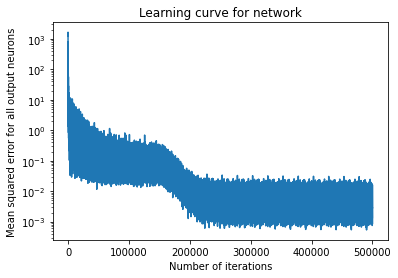

In [7]:
plt.semilogy(errors);
plt.title('Learning curve for network');
plt.xlabel('Number of iterations');
plt.ylabel('Mean squared error for all output neurons');

In [8]:
# Make predictions and evaluate metric
y_hat = hlms.predict(X)
ami = metrics.adjusted_mutual_info_score(y, y_hat)
print('Clustering performance (adjusted mutual information)', ami)

Clustering performance (adjusted mutual information) 1.0
